### Deep Learning Course
     
2021/2022
***
Gonçalo Faria, Rita Ramos, Marcos Treviso
***
# Pytorch Basics

Pytorch is a platform for deep learning in Python/C++. It provides tools for efficiently creating, training, testing and analyzing neural networks. 

We devided the lab in 2 parts, showing PyTorch serves two broad purposes: 
* PART I : A replacement for NumPy to use the power of GPUs. 
* PART II : An automatic differentiation library that is useful to implement neural networks. 

In [2]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt

# Tensors

Here we introduce the most fundamental PyTorch concept: the [Tensor](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html). Tensors are identical to numpy arrays. 

### PyTorch Tensor vs. Numpy


#### Numpy

Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. 

For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

#### PyTorch Tensor

A PyTorch Tensor is identical to a numpy array: essencially, a Pytorch Tensor is another of saying n-dimensional array.    

PyTorch can utilize GPUs (or other hardware accelerators) to perform numeric computations. And, behind the scenes, Tensors can keep track of a computational graph and gradients, and they’re also useful as a generic tool for scientific computing.

In [12]:
#with numpy:
v1 = np.array([2, 4, 6, 8])

#with pytorch:
v2 = torch.tensor([2, 4, 6, 8]) 

print("v1:", v1)
print("v2:", v2)

print("\nshape v2:", v2.shape) #one-dimensional tensor of size 4 (vector)

v1: [2 4 6 8]
v2: tensor([2, 4, 6, 8])

shape v2: torch.Size([4])


# Tensor Initialization

A tensor can be initialized directly from different ways, such as: 
   - data/manually
   - numpy
   - randomly
   - constant values

In [13]:
#from data/manually
data = [1, 2, 3]
x_data = torch.tensor(data)
print("x_data", x_data)


#from numpy
np_array = np.array(data)
x_np_ex1 = torch.from_numpy(np_array) #same memory (the tensor shares the same data) -> changes to np_array impact the tensor
x_np_ex2 = torch.tensor(np_array) # a new tensor is created ("clone") -> changes to np_array have NO impact on the tensor

print("\nnp_array", np_array)
print("x_np_ex1", x_np_ex1)
print("x_np_ex2", x_np_ex2)

np_array[0]=10 #Changes to np_array impact the tensor initialized "from_numpy"
print("\nmodified np_array", np_array)
print("x_np_ex1", x_np_ex1) #affected
print("x_np_ex2", x_np_ex2) 
 

# randomly, constant, etc.
x_rand = torch.rand((3)) 
x_ones_ex1 = torch.ones((1,3)) # one row with 3 collumns (like numpy)
x_ones_ex2 = torch.ones((3,1)) # 3 rows with 1 collumns (like numpy)
x_zeros = torch.zeros(3)
x_ordered = torch.arange(3,6)

print("\nx_rand", x_rand)
print("x_ones_ex1", x_ones_ex1)
print("x_ones_ex2", x_ones_ex2)
print("x_zeros", x_zeros)
print("x_ordered", x_ordered)

x_data tensor([1, 2, 3])

np_array [1 2 3]
x_np_ex1 tensor([1, 2, 3])
x_np_ex2 tensor([1, 2, 3])

modified np_array [10  2  3]
x_np_ex1 tensor([10,  2,  3])
x_np_ex2 tensor([1, 2, 3])

x_rand tensor([0.9772, 0.1209, 0.2445])
x_ones_ex1 tensor([[1., 1., 1.]])
x_ones_ex2 tensor([[1.],
        [1.],
        [1.]])
x_zeros tensor([0., 0., 0.])
x_ordered tensor([3, 4, 5])


# Tensor attributes:

Tensor attributes describe their <b> shape</b>, <b>datatype</b>, and the <b>device</b> on which they are stored.

In [14]:
x = torch.rand((1,3))
print(x)
print("\nShape of tensor:", x.shape) # you can also use tensor.size()
print("Datatype of tensor:", x.dtype)
print("Device tensor is stored on:", x.device) #we will see later on how to move to GPU, if available. 

tensor([[0.4158, 0.2939, 0.9538]])

Shape of tensor: torch.Size([1, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Examples of tensors with different shapes

### Scalar

In [15]:
x = torch.tensor(7)

print("x:", x)
print("x value:", x.item())
print("shape:", x.size())

x: tensor(7)
x value: 7
shape: torch.Size([])


### Vector

In [16]:
x = torch.tensor([7])
print("x:", x)
print("shape:", x.size())

x = torch.rand(1)
print("\nx:", x)
print("shape:", x.size())

x = torch.zeros((3))
print("\nx:", x)
print("shape:", x.size())

x = torch.arange(10,17)
print("\nx:", x)
print("shape:", x.size())

x: tensor([7])
shape: torch.Size([1])

x: tensor([0.2520])
shape: torch.Size([1])

x: tensor([0., 0., 0.])
shape: torch.Size([3])

x: tensor([10, 11, 12, 13, 14, 15, 16])
shape: torch.Size([7])


### Matrix

In [17]:
x = torch.tensor([[2, 4, 6,8], [1, 2, 3,4], [7, 8, 9,10]])

print("x:\n", x)
print("shape:", x.size())

x = torch.ones(2,2)
print("\n\nx:", x)
print("shape:", x.size())

x = torch.zeros(3,1)
print("\n\nx:", x)
print("shape:", x.size())


x = torch.zeros(1,3)
print("\n\nnx:", x)
print("shape:", x.size())


x= torch.arange(1,10).view(3,3) #view reshapes the tensor into a 3 by 3 matrix
print("\n\nx:\n", x)
print("shape:", x.size())

x:
 tensor([[ 2,  4,  6,  8],
        [ 1,  2,  3,  4],
        [ 7,  8,  9, 10]])
shape: torch.Size([3, 4])


x: tensor([[1., 1.],
        [1., 1.]])
shape: torch.Size([2, 2])


x: tensor([[0.],
        [0.],
        [0.]])
shape: torch.Size([3, 1])


nx: tensor([[0., 0., 0.]])
shape: torch.Size([1, 3])


x:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
shape: torch.Size([3, 3])


### N-dimensional array

Imagine you have an image with (256 w,  256 h,  3 channels).  

In [18]:
x=torch.rand((5,5,3))
print("\nx:", x)
print("shape:", x.size())


x: tensor([[[2.7547e-02, 6.4726e-02, 2.9013e-01],
         [5.6791e-01, 6.0790e-01, 5.4215e-01],
         [3.6920e-01, 4.6484e-01, 5.6864e-01],
         [6.2335e-01, 7.0076e-02, 5.3817e-04],
         [5.2045e-01, 2.1630e-01, 6.7589e-01]],

        [[6.0691e-01, 7.0508e-01, 9.8696e-01],
         [2.4445e-01, 3.0725e-01, 6.2452e-01],
         [5.5594e-02, 6.7637e-01, 5.2107e-01],
         [2.7114e-01, 4.1074e-01, 4.1017e-01],
         [1.0007e-01, 4.6935e-02, 4.5747e-01]],

        [[5.2342e-01, 5.3630e-01, 5.0829e-01],
         [7.6594e-01, 2.6613e-01, 4.5242e-01],
         [8.8180e-01, 5.4876e-02, 7.7306e-01],
         [4.1347e-01, 7.9534e-01, 4.3317e-01],
         [1.3849e-01, 6.9982e-01, 1.6714e-01]],

        [[1.8933e-01, 9.7084e-01, 3.5585e-02],
         [4.0057e-02, 1.2034e-01, 3.2184e-01],
         [4.1115e-01, 2.0690e-02, 1.7752e-02],
         [2.1451e-01, 4.2323e-01, 8.4731e-01],
         [2.9668e-01, 2.6188e-01, 7.1611e-01]],

        [[3.4657e-01, 8.6109e-01, 8.5586e-01],
 

Example of an actual image and having it stored in a tensor

shape torch.Size([480, 640, 3])


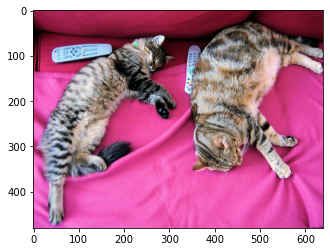

In [3]:
from PIL import Image
import torchvision.transforms.functional as TF
import requests
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image_tensor = TF.to_tensor(image)
image_tensor = image_tensor.permute(
    [1,2,0]) # make the color dimention the last one.
print("shape", image_tensor.shape)
plt.imshow(image_tensor)
plt.show()

Image now you want to represent a batch of images. Ex: for each iteration, 10 training examples of images.

In [28]:
urls = ["http://images.cocodataset.org/val2017/000000039769.jpg", 
        "http://images.cocodataset.org/val2017/000000039769.jpg"]
#all_images=torch.tensor([])
batched_images = [] 
for url in urls:
    image = Image.open(requests.get(url, stream=True).raw)
    image_tensor = torch.permute(
        TF.to_tensor(image),
        [1,2,0]) # make dimention the last one. 
    batched_images.append( image_tensor )

all_images = torch.stack(batched_images,axis=0) #concatenate in the first dim

print("shape", all_images.shape)


shape torch.Size([2, 480, 640, 3])


# Indexing

Indexing is similar to numpy, you can access values of specific row(s) and collumn(s). 

In [4]:
# = Matrix indexing = #
A= torch.arange(1,10).view(3,3)
print("A",A)

# Simple indexing
print("\nA[0]:", A[0]) #indexing by row 0
print("A[1]:", A[1]) #indexing by row 1
print("A[1, 2]:", A[1, 2])  # indexing row 1 with collumn 2 (More efficient)
print("A[0][2]:", A[0][2])  # indexing row 0 with collumn 2 (Less efficient)

# -- Slicing

# Rows between 1 and 2 (excluding the latter), 
# columns between 0 and 1 (excluding the latter)
print("A[1:2,0:1]:", A[1:2,0:1])

# All rows except the last two,
# every other column
print("A[:-2,::2]:", A[:-2,::2]) 

# -- Tensors as indices
#You can also do multi-index selection with gather
indexes = torch.tensor([[0, 2, 2], 
                         [0, 1, 1], 
                         [2, 0, 1]])

print("\n\nindexes",indexes)

indexed_dim1 = torch.gather(A, 1, indexes) # dim is 1
print("\nindexed_dim1", indexed_dim1)

indexed_dim0 = torch.gather(A, 0, indexes) # dim is 0
print("indexed_dim1", indexed_dim0)

A tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

A[0]: tensor([1, 2, 3])
A[1]: tensor([4, 5, 6])
A[1, 2]: tensor(6)
A[0][2]: tensor(3)
A[1:2,0:1]: tensor([[4]])
A[:-2,::2]: tensor([[1, 3]])


indexes tensor([[0, 2, 2],
        [0, 1, 1],
        [2, 0, 1]])

indexed_dim1 tensor([[1, 3, 3],
        [4, 5, 5],
        [9, 7, 8]])
indexed_dim1 tensor([[1, 8, 9],
        [1, 5, 6],
        [7, 2, 6]])


# Operations

### Elementwise operations

In [25]:
v1 = torch.arange(10)
v2 = torch.arange(10, 20)
print("v1", v1)
print("v2",v2)

v1 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
v2 tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [26]:
v1 + v2

tensor([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [27]:
v1 * v2

tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

Some caveats when working with integer values!

In [28]:
v1 / v2 

tensor([0.0000, 0.0909, 0.1667, 0.2308, 0.2857, 0.3333, 0.3750, 0.4118, 0.4444,
        0.4737])

In [29]:
x = v1.float()
y = v2.float()
x / y

tensor([0.0000, 0.0909, 0.1667, 0.2308, 0.2857, 0.3333, 0.3750, 0.4118, 0.4444,
        0.4737])

#### Operations with constants

In [30]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [31]:
x + 1

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [32]:
x ** 2

tensor([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

#### Multiplication of matrices

In [35]:
m1 = torch.rand(5, 4)
m2 = torch.rand(4, 5)

print("m1: %s\n" % m1)
print("m2: %s\n" % m2)
print(m1@(m2)) #dot is for numpy -> use matmul instead

m1: tensor([[0.5520, 0.0072, 0.3438, 0.9107],
        [0.8767, 0.9323, 0.8986, 0.4148],
        [0.5263, 0.1835, 0.4938, 0.2878],
        [0.6080, 0.9610, 0.9012, 0.3797],
        [0.5580, 0.4120, 0.7629, 0.5696]])

m2: tensor([[0.6661, 0.7313, 0.5705, 0.3459, 0.6019],
        [0.8347, 0.0842, 0.0374, 0.0470, 0.7963],
        [0.8934, 0.0616, 0.2276, 0.0374, 0.8150],
        [0.6744, 0.2414, 0.9367, 0.4769, 0.2207]])

tensor([[1.2949, 0.6453, 1.2465, 0.6385, 0.8192],
        [2.4447, 0.8752, 1.1282, 0.5785, 2.0940],
        [1.1389, 0.5002, 0.6891, 0.3464, 0.9288],
        [2.2683, 0.6727, 0.9437, 0.4703, 1.9495],
        [1.7813, 0.6273, 1.0410, 0.5126, 1.4115]])


Oops... that can be misleading if you are used to numpy. Instead, call `matmul` (or `@`)

In [36]:
print(m1.matmul(m2))

tensor([[1.2949, 0.6453, 1.2465, 0.6385, 0.8192],
        [2.4447, 0.8752, 1.1282, 0.5785, 2.0940],
        [1.1389, 0.5002, 0.6891, 0.3464, 0.9288],
        [2.2683, 0.6727, 0.9437, 0.4703, 1.9495],
        [1.7813, 0.6273, 1.0410, 0.5126, 1.4115]])


In [37]:
print(m1 @ m2)

tensor([[1.2949, 0.6453, 1.2465, 0.6385, 0.8192],
        [2.4447, 0.8752, 1.1282, 0.5785, 2.0940],
        [1.1389, 0.5002, 0.6891, 0.3464, 0.9288],
        [2.2683, 0.6727, 0.9437, 0.4703, 1.9495],
        [1.7813, 0.6273, 1.0410, 0.5126, 1.4115]])


You can also use `mm`, but for batched data it's better to use `matmul`, `@`. Carreful, this is a common source of errors. 

There's also `bmm` that works for 3d tensors.

In [45]:
#for batch data don't use mm
m1 = torch.rand(2, 5, 4)
m2 = torch.rand(2, 4, 5)
print(m1)

print(m1.mm(m2))

tensor([[[0.9791, 0.7057, 0.0438, 0.8165],
         [0.1300, 0.5553, 0.5440, 0.2999],
         [0.8624, 0.2577, 0.4573, 0.6646],
         [0.5774, 0.2803, 0.3752, 0.0687],
         [0.1788, 0.1183, 0.0392, 0.1805]],

        [[0.8773, 0.3870, 0.1262, 0.3538],
         [0.2937, 0.9620, 0.4946, 0.8396],
         [0.6393, 0.5281, 0.1753, 0.6291],
         [0.6890, 0.9428, 0.3631, 0.6694],
         [0.2494, 0.3032, 0.5068, 0.7653]]])


RuntimeError: self must be a matrix

In [46]:
#for batch data use instead matmul, @ or bmm()
print(m1.matmul(m2))
print(m1@(m2))
print(m1.bmm(m2)) #For 3d tensors you can also use .bmm

tensor([[[0.9925, 2.0326, 2.0474, 1.7655, 1.0679],
         [0.7369, 1.3172, 0.7010, 0.7077, 0.8392],
         [0.8430, 1.8395, 1.5467, 1.2585, 1.1895],
         [0.6003, 1.2233, 0.7992, 0.6352, 0.6781],
         [0.1960, 0.4068, 0.3929, 0.3388, 0.2372]],

        [[1.0490, 0.7891, 0.6242, 0.6261, 1.2069],
         [2.1372, 0.8760, 0.7337, 1.5112, 1.7805],
         [1.3829, 0.7724, 0.6774, 0.9733, 1.2654],
         [1.9874, 0.9897, 0.8203, 1.3030, 1.8975],
         [1.4428, 0.7398, 0.5250, 1.0989, 1.0955]]])
tensor([[[0.9925, 2.0326, 2.0474, 1.7655, 1.0679],
         [0.7369, 1.3172, 0.7010, 0.7077, 0.8392],
         [0.8430, 1.8395, 1.5467, 1.2585, 1.1895],
         [0.6003, 1.2233, 0.7992, 0.6352, 0.6781],
         [0.1960, 0.4068, 0.3929, 0.3388, 0.2372]],

        [[1.0490, 0.7891, 0.6242, 0.6261, 1.2069],
         [2.1372, 0.8760, 0.7337, 1.5112, 1.7805],
         [1.3829, 0.7724, 0.6774, 0.9733, 1.2654],
         [1.9874, 0.9897, 0.8203, 1.3030, 1.8975],
         [1.4428, 0.7398,

What if I have even more dimensions?

In [47]:
m1 = torch.rand(2, 3, 5, 4)
m2 = torch.rand(2, 3, 4, 5)

print(m1.bmm(m2)) 

RuntimeError: Expected 3-dimensional tensor, but got 4-dimensional tensor for argument #1 'batch1' (while checking arguments for bmm)

`.bmm` works with 3d tensors. We can use the more general `matmul` or `@` instead.

In [40]:
m1 = torch.rand(2, 3, 5, 4)
m2 = torch.rand(2, 3, 4, 5)

print(m1.matmul(m2)) 

tensor([[[[0.8657, 0.9738, 0.3437, 0.3736, 1.0965],
          [0.5436, 0.9778, 0.1639, 0.1501, 0.6547],
          [1.2755, 1.6704, 0.4559, 0.4037, 1.5694],
          [0.9914, 0.8402, 0.3646, 0.3154, 0.6528],
          [1.4698, 1.7488, 0.5212, 0.4465, 1.5116]],

         [[1.4767, 1.4919, 1.8555, 1.1906, 2.1602],
          [0.5548, 0.5101, 0.6609, 0.4485, 0.7687],
          [1.1261, 1.2733, 1.1512, 0.6770, 1.5569],
          [0.9616, 0.8399, 0.9907, 0.4858, 1.2351],
          [1.7914, 1.2182, 1.6769, 1.2455, 2.0383]],

         [[0.5411, 0.5808, 0.6317, 1.1238, 1.2219],
          [0.5769, 0.8286, 0.8423, 1.3140, 1.5758],
          [1.0017, 0.9447, 1.0018, 1.7097, 1.8854],
          [0.7744, 0.4870, 0.5860, 1.2605, 1.2618],
          [0.5380, 0.3682, 0.4476, 0.9406, 0.8900]]],


        [[[0.2859, 0.5871, 0.5725, 0.4685, 0.6062],
          [1.3424, 1.2191, 0.9486, 1.3449, 0.6944],
          [0.7727, 0.7698, 0.6903, 0.8279, 0.6447],
          [0.8547, 0.6118, 0.6877, 0.7280, 0.7612],
    

In [48]:
print(m1.matmul(m2).shape)
print(m1.matmul(m2))

torch.Size([2, 3, 5, 5])
tensor([[[[0.9116, 1.3549, 0.3635, 1.0000, 1.1498],
          [0.2787, 0.5472, 0.5101, 1.0204, 0.9795],
          [0.5017, 0.8932, 0.3499, 1.1158, 1.2395],
          [0.9360, 1.3540, 0.4357, 1.0621, 1.1528],
          [0.2652, 0.4486, 0.3784, 0.9917, 0.9302]],

         [[0.8852, 0.6429, 1.2049, 0.3741, 0.6408],
          [1.0819, 1.2580, 1.5215, 0.6240, 0.8008],
          [0.5112, 1.2896, 0.8617, 0.2493, 0.4374],
          [0.5548, 0.8951, 0.7782, 0.3102, 0.4469],
          [0.8176, 1.0822, 1.1520, 0.4085, 0.6340]],

         [[0.4722, 1.0482, 1.0079, 0.4657, 0.2534],
          [1.3627, 1.3442, 1.8287, 1.0080, 0.7820],
          [0.8136, 1.2989, 1.5308, 0.6876, 0.4602],
          [1.4736, 1.7426, 1.8356, 1.1606, 0.8076],
          [1.5876, 1.8117, 2.1703, 1.2103, 0.8882]]],


        [[[0.5776, 0.8064, 0.4161, 1.1248, 0.9050],
          [0.5326, 0.6438, 0.4744, 0.7734, 0.8072],
          [0.8829, 1.1295, 0.5288, 1.1844, 1.1863],
          [0.4966, 0.7186, 0.26

Anoter option is to use the powerful `einsum` function. Let's say our input have the following representation:
- `b` = batch size 
- `c` = channels
- `i` = `m1` timesteps
- `j` = `m2` timesteps
- `d` = hidden size

In [42]:
torch.einsum('bcid,bcdj->bcij', m1, m2)

tensor([[[[0.8657, 0.9738, 0.3437, 0.3736, 1.0965],
          [0.5436, 0.9778, 0.1639, 0.1501, 0.6547],
          [1.2755, 1.6704, 0.4559, 0.4037, 1.5694],
          [0.9914, 0.8402, 0.3646, 0.3154, 0.6528],
          [1.4698, 1.7488, 0.5212, 0.4465, 1.5116]],

         [[1.4767, 1.4919, 1.8555, 1.1906, 2.1602],
          [0.5548, 0.5101, 0.6609, 0.4485, 0.7687],
          [1.1261, 1.2733, 1.1512, 0.6770, 1.5569],
          [0.9616, 0.8399, 0.9907, 0.4858, 1.2351],
          [1.7914, 1.2182, 1.6769, 1.2455, 2.0383]],

         [[0.5411, 0.5808, 0.6317, 1.1238, 1.2219],
          [0.5769, 0.8286, 0.8423, 1.3140, 1.5758],
          [1.0017, 0.9447, 1.0018, 1.7097, 1.8854],
          [0.7744, 0.4870, 0.5860, 1.2605, 1.2618],
          [0.5380, 0.3682, 0.4476, 0.9406, 0.8900]]],


        [[[0.2859, 0.5871, 0.5725, 0.4685, 0.6062],
          [1.3424, 1.2191, 0.9486, 1.3449, 0.6944],
          [0.7727, 0.7698, 0.6903, 0.8279, 0.6447],
          [0.8547, 0.6118, 0.6877, 0.7280, 0.7612],
    

See more about `einsum` here: https://pytorch.org/docs/master/generated/torch.einsum.html#torch.einsum

### Broadcasting

Broadcasting means doing some arithmetic operation with tensors of different ranks, as if the smaller one were expanded, or broadcast, to match the larger.

Let's experiment with a matrix (rank 2 tensor) and a vector (rank 1).

In [49]:
m = torch.rand(5, 4)
v = torch.arange(4)

print("m:", m)
print("\nv:", v)

m: tensor([[0.1144, 0.9027, 0.0816, 0.8506],
        [0.3141, 0.8211, 0.7830, 0.6086],
        [0.4474, 0.5155, 0.5862, 0.4229],
        [0.7382, 0.6912, 0.7181, 0.2513],
        [0.4255, 0.0811, 0.8796, 0.4789]])

v: tensor([0, 1, 2, 3])


In [50]:
m_plus_v = m + v
print("m + v:\n", m_plus_v)

m + v:
 tensor([[0.1144, 1.9027, 2.0816, 3.8506],
        [0.3141, 1.8211, 2.7830, 3.6086],
        [0.4474, 1.5155, 2.5862, 3.4229],
        [0.7382, 1.6912, 2.7181, 3.2513],
        [0.4255, 1.0811, 2.8796, 3.4789]])


We can also reshape tensors

In [51]:
v = v.view(2, 2)
v

tensor([[0, 1],
        [2, 3]])

In [52]:
v = v.view(4, 1)
v

tensor([[0],
        [1],
        [2],
        [3]])

Note that shape `[4, 1]` is not broadcastable to match `[5, 4]`!

In [53]:
m + v

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 0

... but `[1, 4]` is!

In [54]:
v = v.view(1, 4)
m + v

tensor([[0.1144, 1.9027, 2.0816, 3.8506],
        [0.3141, 1.8211, 2.7830, 3.6086],
        [0.4474, 1.5155, 2.5862, 3.4229],
        [0.7382, 1.6912, 2.7181, 3.2513],
        [0.4255, 1.0811, 2.8796, 3.4789]])

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [55]:
x = torch.rand(5,7,3)
y = torch.rand(5,7,3)
z = x + y
# same shapes are always broadcastable (i.e. the above rules always hold)

In [56]:
x = torch.rand((0,))
y = torch.rand(2,2)
z = x + y
# x and y are not broadcastable, because x does not have at least 1 dimension

RuntimeError: The size of tensor a (0) must match the size of tensor b (2) at non-singleton dimension 1

In [57]:
# can line up trailing dimensions
x = torch.empty(5,3,4,1)
y = torch.empty(  3,1,1)
z = x + y
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

In [63]:
# but:
x = torch.empty(5,2,4,1)
y = torch.empty(  3,1,1)
z = x + y
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

Always take care with tensor shapes! It is a good practice to verify in the interpreter how some expression is evaluated before inserting into your model code. 

In other words, **you can use pytorch's dynamic graph creation ability to debug your model by printing tensor shapes!**

And see more about broadcasting here: https://pytorch.org/docs/master/notes/broadcasting.html

# But what about GPUs?

You can change default device of cpu to GPU, if you have one. 

In [65]:
my_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("my_device:", my_device)

x = torch.eye(3)  # data is on the cpu 
print("By default device tensor is stored on:", x.device)

# you can move data to the GPU by doing .to(device)
x.to(my_device)  # data is moved to my_device
print("\nDevice tensor is now stored on:", x.device) #it will still be cpu if you don't have gpu

my_device: cpu
By default device tensor is stored on: cpu

Device tensor is now stored on: cpu


If you have a GPU you should get something like: 
`device(type='cuda', index=0)` -> now the computation happens on the GPU.

# Tutorials: 

Get familiar with pytorch with more tutorials: 
- https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
- https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/